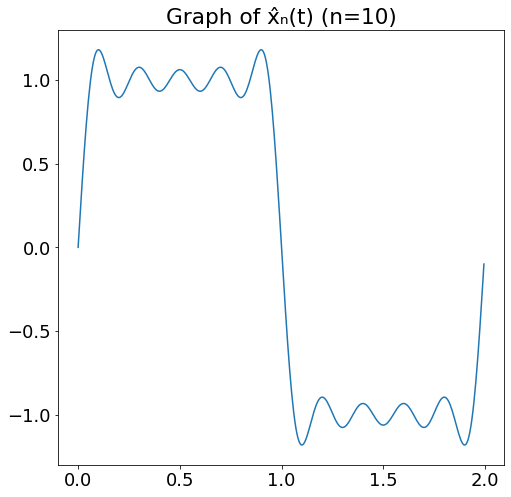

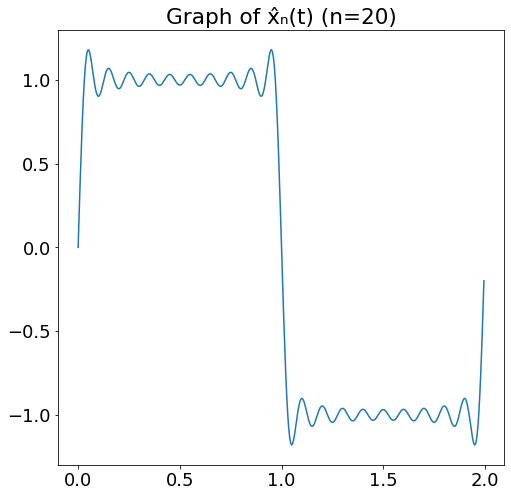

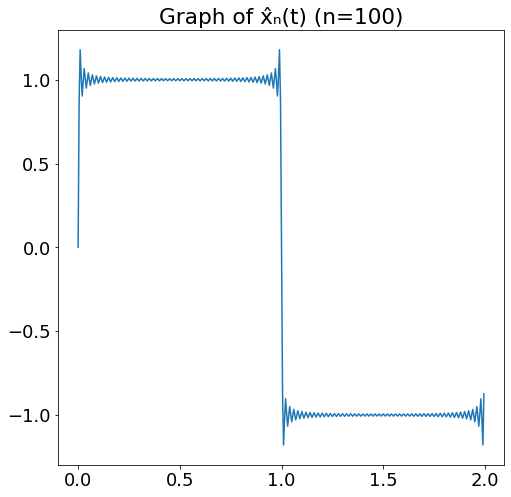

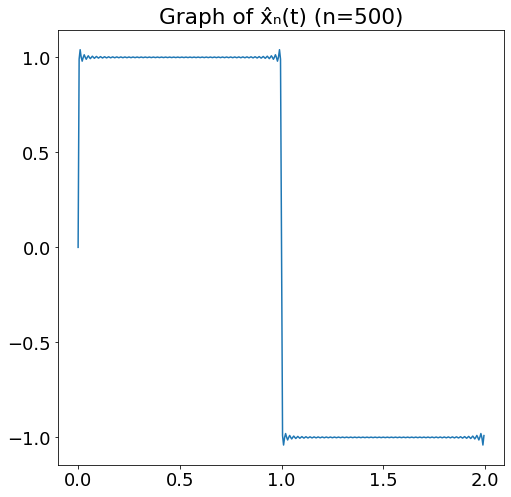

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi

plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams.update({'font.size': 18})

dt = 0.005
t = np.arange(0, 2, dt)

def periodic(t, xn, N):
    for n in range (1,int(N+1)):
        if n%2==1:
          xn = xn + 4/pi*(1/n)*np.sin(n*pi*t)
    
    return xn

N_list = [10, 20, 100, 500]

for N in N_list:
    xn = periodic(t, 0, N)
    plt.title(f"Graph of x̂ₙ(t) (n={N})")
    plt.plot(t, xn)
    plt.savefig(f'1-{N}.png', dpi=300)
    plt.show()

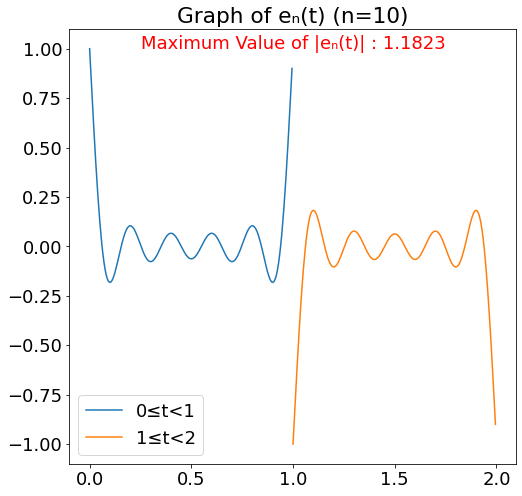

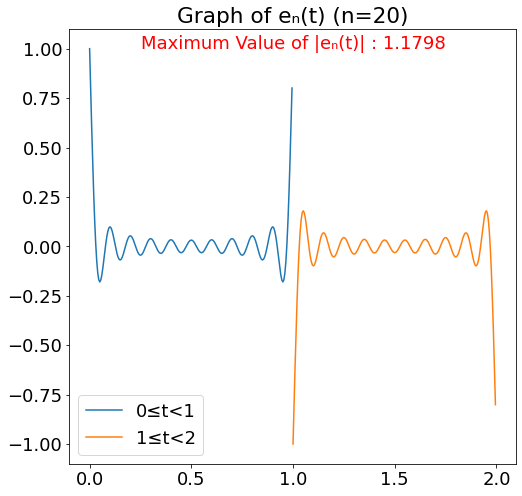

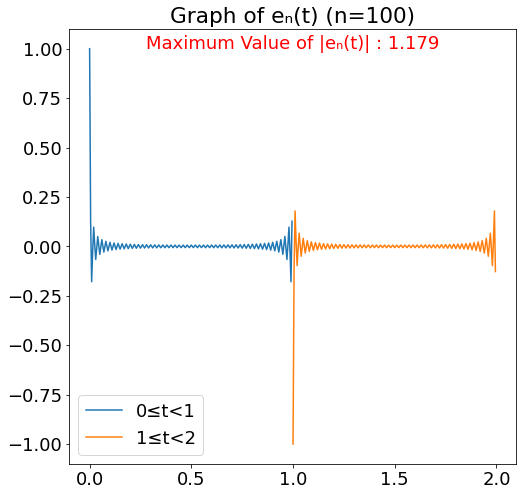

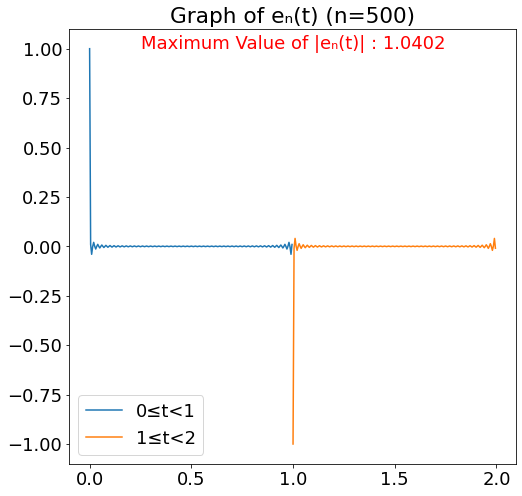

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi

plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams.update({'font.size': 18})

dt = 0.005
t1 = np.arange(0, 1, dt)
t2 = np.arange(1, 2, dt)
all_t = np.arange(0, 2+dt, dt)

def periodic(t, xn, N):
    for n in range (1,int(N+1)):
        if n%2==1:
          xn = xn +4/pi*(1/n)*np.sin(n*pi*t)
    return xn

N_list = [10, 20, 100, 500]

for N in N_list:
    plt.title(f"Graph of eₙ(t) (n={N})")
    error = {}

    xn1 = periodic(t1, 0, N)
    for x in xn1:
        error[x] = abs(1-xn1)
    plt.plot(t1, 1-xn1, label="0≤t<1")

    xn2 = periodic(t2, 0, N)
    for x in xn2:
        error[x] = abs(-1-xn1)
    plt.plot(t2, -1-xn2, label="1≤t<2")

    plt.text(1, 1, f'Maximum Value of |eₙ(t)| : {str(round(max(error), 4))}', color='r', horizontalalignment='center')
    plt.legend(loc = "lower left")
    plt.savefig(f'2-{N}.png', dpi=300)
    plt.show()